In [48]:
import pandas as pd

df=pd.read_csv("hotel_bookings.csv")
print(df.head())

print(df.info())

print(df.describe(include="all"))

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [49]:
#checking for duplicates

print("Duplicate rows before cleaning:",df.duplicated().sum())

#drop duplicates
df=df.drop_duplicates()

#after dropping duplicates
print("Duplicate rows after cleaning:",df.duplicated().sum())

Duplicate rows before cleaning: 31994
Duplicate rows after cleaning: 0


In [50]:
#checking for missing values

missing=df.isnull().sum()
print(missing[missing>0]) #missing values

children        4
country       452
agent       12193
company     82137
dtype: int64


In [51]:
#filling missing children with mode/median (mode==most common number of children)

df['children']=df['children'].fillna(df['children'].mode()[0])

In [52]:
#filling missing country values with 'unknown'

df['country']=df['country'].fillna('Unknown')

In [53]:
#filling missing agent id's with 0 and convert to integer

df['agent']=df['agent'].fillna(0).astype(int)

In [54]:
threshold=0.4*len(df)
df=df.dropna(thresh=threshold,axis=1)

In [55]:
df=df.dropna()

In [56]:
#final check

print("remaining missing values:",df.isnull().sum().sum())

remaining missing values: 0


In [57]:
#fix datatypes and format issues

df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [58]:
#standardizing text fields(meal,market_segment,distribution_channel)

text_cols=['meal','market_segment','distribution_channel','deposit_type','customer_type']

for cols in text_cols:
    df[cols]=df[cols].str.upper().str.strip()

In [59]:
#ensuring all numerical columns have correct types

#already converted agent to integer

df['children']=df['children'].astype(int)
df['adults']=df['adults'].astype(int)
df['babies']=df['babies'].astype(int)

In [60]:
#detect and handle outliers

#remove bookings with 0 guests

df=df[~((df['adults']==0) & (df['children']==0) & (df['babies']==0))]

In [61]:
#detect outliers in adr(average daily rate)

#using IQR method - removing high adr values

Q1=df['adr'].quantile(0.25)
Q3=df['adr'].quantile(0.75)
IQR=Q3-Q1

upper_bound=Q3+1.5*IQR

#remove outliers
df=df[df['adr']<=upper_bound]

In [62]:
Q1_lt=df['lead_time'].quantile(0.25)
Q3_lt=df['lead_time'].quantile(0.75)
IQR_lt=Q3_lt-Q1_lt

upper_cap_lt=Q3_lt+1.5*IQR_lt

df['lead_time']=df['lead_time'].apply(lambda x:upper_cap_lt if x>upper_cap_lt else x)

In [63]:
#one hot encoding for the catrgorical values

# cat_cols=['hotel', 'meal', 'market_segment', 'distribution_channel',
#     'reserved_room_type', 'assigned_room_type',
#     'deposit_type', 'customer_type', 'reservation_status']

df=pd.get_dummies(df,drop_first=True)

In [65]:
df.shape

(84722, 247)

In [66]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_NON REFUND,deposit_type_REFUNDABLE,customer_type_GROUP,customer_type_TRANSIENT,customer_type_TRANSIENT-PARTY,reservation_status_Check-Out,reservation_status_No-Show
0,0,298.5,2015,27,1,0,0,2,0,0,...,False,False,False,False,False,False,True,False,True,False
1,0,298.5,2015,27,1,0,0,2,0,0,...,False,False,False,False,False,False,True,False,True,False
2,0,7.0,2015,27,1,0,1,1,0,0,...,False,False,False,False,False,False,True,False,True,False
3,0,13.0,2015,27,1,0,1,1,0,0,...,False,False,False,False,False,False,True,False,True,False
4,0,14.0,2015,27,1,0,2,2,0,0,...,False,False,False,False,False,False,True,False,True,False


In [68]:
df.to_csv("cleaned_hotel_bookings.csv",index=False)
print("Cleaned dataset saved as 'cleaned_hotel_bookings.csv'")

Cleaned dataset saved as 'cleaned_hotel_bookings.csv'


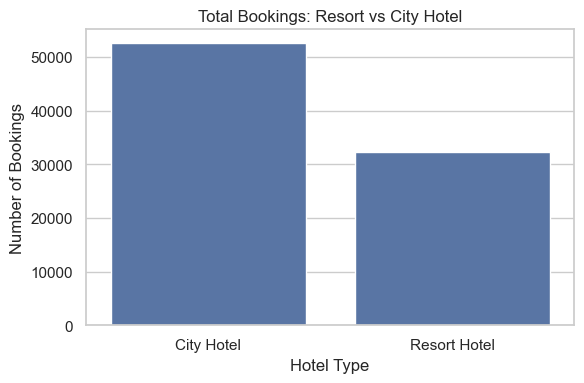

<Figure size 640x480 with 0 Axes>

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

plt.figure(figsize=(6,4))
sns.countplot(data=df,x='hotel_Resort Hotel')
plt.title('Total Bookings: Resort vs City Hotel')
plt.xticks([0,1],['City Hotel','Resort Hotel'])
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()
plt.savefig("hotel_type_count.png")

In [72]:
print(df.columns.tolist())


['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date', 'hotel_Resort Hotel', 'arrival_date_month_August', 'arrival_date_month_December', 'arrival_date_month_February', 'arrival_date_month_January', 'arrival_date_month_July', 'arrival_date_month_June', 'arrival_date_month_March', 'arrival_date_month_May', 'arrival_date_month_November', 'arrival_date_month_October', 'arrival_date_month_September', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_UNDEFINED', 'country_AGO', 'country_ALB', 'country_AND', 'country_ARE', 'country_ARG', 'country_ARM', 'country_ASM', 'country_ATA', 'country_ATF', 'country_AUS', 'country_AUT', 'country_AZE', 'country

In [74]:
# Extract all one-hot month columns
month_columns = [col for col in df.columns if col.startswith('arrival_date_month_')]

# Get the month name by finding which column has value 1
df['arrival_date_month'] = df[month_columns].idxmax(axis=1).str.replace('arrival_date_month_', '')

# Optional: Map to month number if needed later
import calendar
month_name_to_number = {month: index for index, month in enumerate(calendar.month_name) if month}
df['arrival_month_number'] = df['arrival_date_month'].map(month_name_to_number)


In [75]:
# Convert month names to month numbers
df['arrival_date_month'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month

# Combine year, month, and day into a full datetime
df['arrival_date'] = pd.to_datetime(dict(
    year=df['arrival_date_year'],
    month=df['arrival_date_month'],
    day=df['arrival_date_day_of_month']
))


C:\Users\Varshi\AppData\Local\Temp\ipykernel_19956\1277087970.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='arrival_date_year',palette='coolwarm')


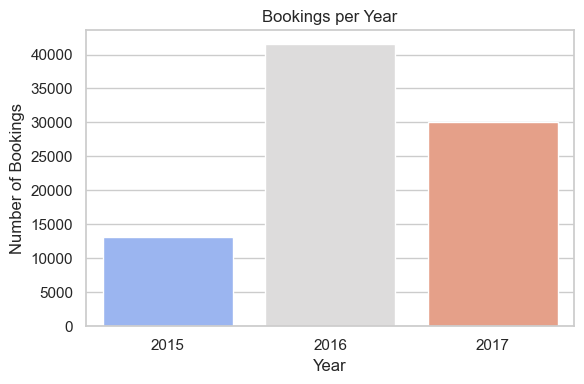

In [77]:
#booking trends over years

plt.figure(figsize=(6,4))
sns.countplot(data=df,x='arrival_date_year',palette='coolwarm')
plt.title('Bookings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

C:\Users\Varshi\AppData\Local\Temp\ipykernel_19956\1377375591.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='is_canceled',palette='Set2')


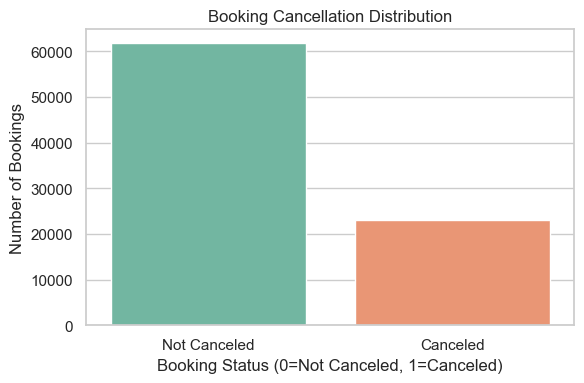

In [78]:
#booking cancellation rate

plt.figure(figsize=(6,4))
sns.countplot(data=df,x='is_canceled',palette='Set2')
plt.title('Booking Cancellation Distribution')
plt.xlabel('Booking Status (0=Not Canceled, 1=Canceled)')
plt.ylabel('Number of Bookings')
plt.xticks([0,1],['Not Canceled','Canceled'])
plt.tight_layout()
plt.show()

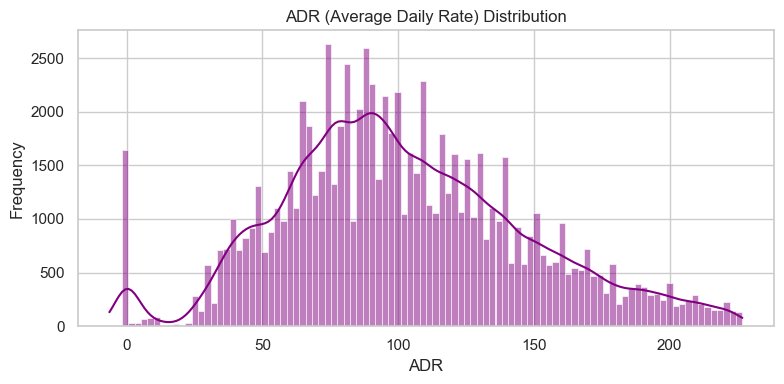

In [82]:
#average daily rate (how much customers are paying per night)

plt.figure(figsize=(8,4))
sns.histplot(df['adr'],bins=100,kde=True, color='purple')
plt.title('ADR (Average Daily Rate) Distribution')
plt.xlabel('ADR')
plt.ylabel('Frequency')
# plt.xlim(0,500) #limiting x-axis to avoid extreme outliers
plt.tight_layout()
plt.show()

C:\Users\Varshi\AppData\Local\Temp\ipykernel_19956\4234361818.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='hotel',y='adr',palette='Set3')


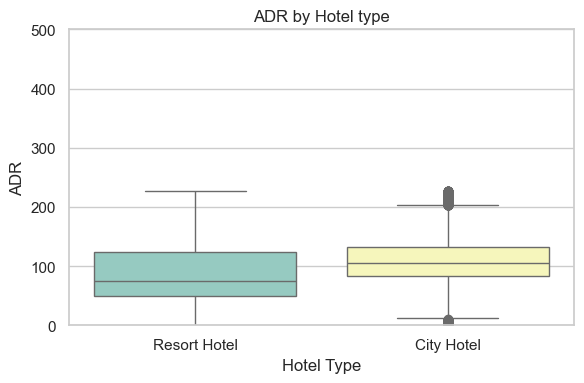

In [85]:
#adr by hotel type

df['hotel']=df['hotel_Resort Hotel'].apply(lambda x: 'Resort Hotel' if x==1 else 'City Hotel')

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='hotel',y='adr',palette='Set3')
plt.title('ADR by Hotel type')
plt.xlabel('Hotel Type')
plt.ylabel('ADR')
plt.ylim(0,500)
plt.tight_layout()
plt.show()

C:\Users\Varshi\AppData\Local\Temp\ipykernel_19956\1519858886.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='is_canceled',y='adr',palette='coolwarm')


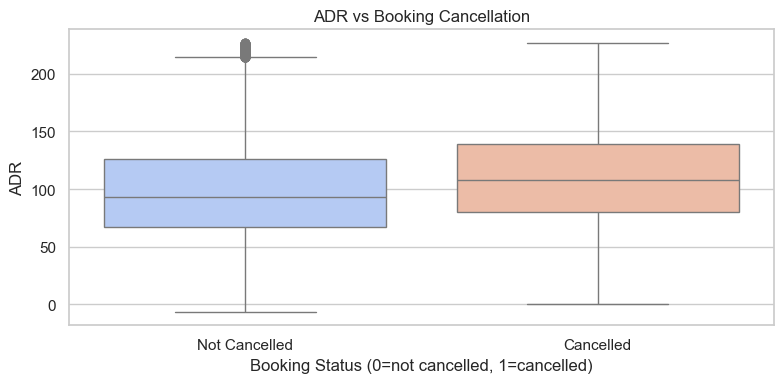

In [86]:
#adr and cancellations

plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='is_canceled',y='adr',palette='coolwarm')
plt.title('ADR vs Booking Cancellation')
plt.xlabel('Booking Status (0=not cancelled, 1=cancelled)')
plt.ylabel('ADR')
plt.xticks([0,1],['Not Cancelled','Cancelled'])
plt.tight_layout()
plt.show()

C:\Users\Varshi\AppData\Local\Temp\ipykernel_19956\1621905652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='total_guests',palette='magma')


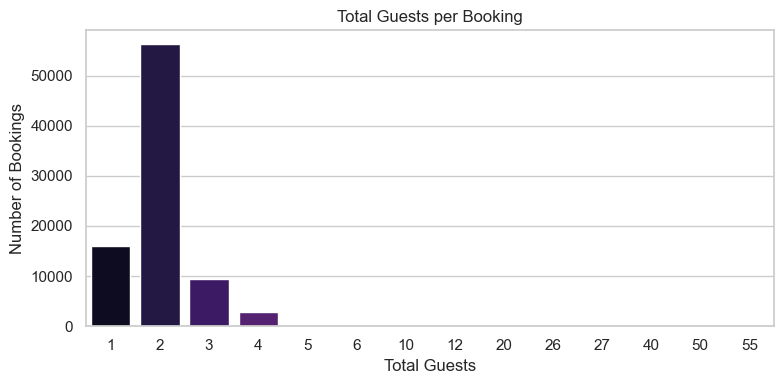

In [87]:
#Guest Composition (who are more common)

df['total_guests']=df['adults']+df['children'].fillna(0)+df['babies'].fillna(0)

plt.figure(figsize=(8,4))
sns.countplot(data=df,x='total_guests',palette='magma')
plt.title('Total Guests per Booking')
plt.xlabel('Total Guests')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

C:\Users\Varshi\AppData\Local\Temp\ipykernel_19956\813140218.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='total_of_special_requests',palette='viridis')


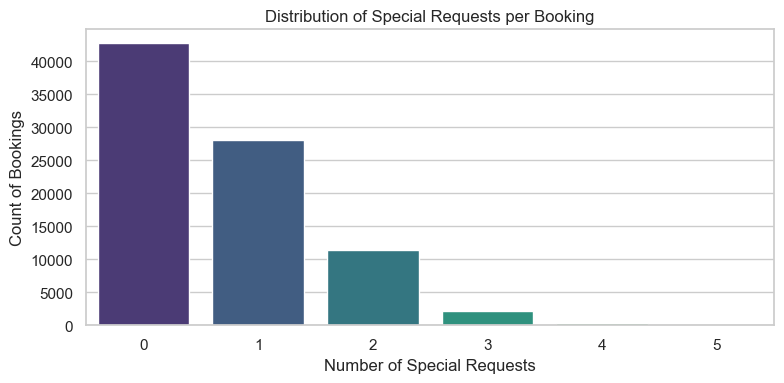

In [88]:
#special request analysis

plt.figure(figsize=(8,4))
sns.countplot(data=df,x='total_of_special_requests',palette='viridis')
plt.title('Distribution of Special Requests per Booking')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count of Bookings')
plt.tight_layout()
plt.show()

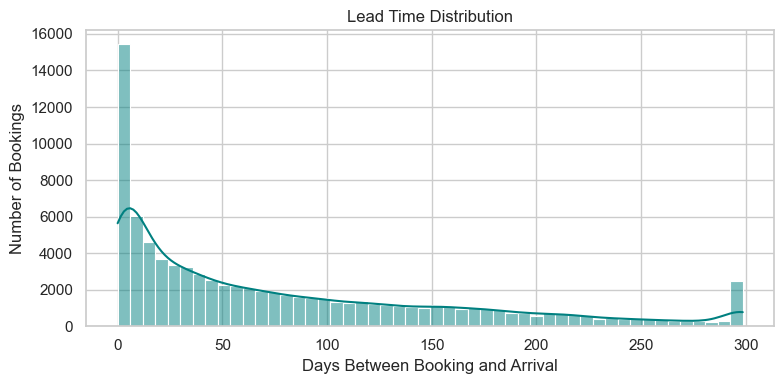

In [89]:
#lead time distribution

plt.figure(figsize=(8,4))
sns.histplot(df['lead_time'],bins=50,kde=True,color='teal')
plt.title('Lead Time Distribution')
plt.xlabel('Days Between Booking and Arrival')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

C:\Users\Varshi\AppData\Local\Temp\ipykernel_19956\1472686165.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values,y=top_countries.index.str.replace('country_',''),palette='coolwarm')


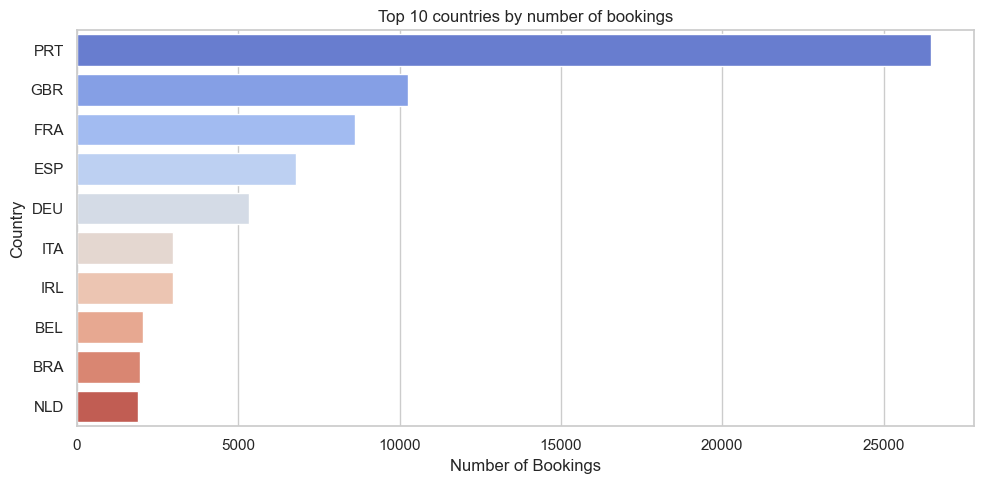

In [90]:
#top 10 countries by booking count

top_countries=df[[col for col in df.columns if col.startswith('country_')]].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values,y=top_countries.index.str.replace('country_',''),palette='coolwarm')
plt.title('Top 10 countries by number of bookings')
plt.xlabel('Number of Bookings')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

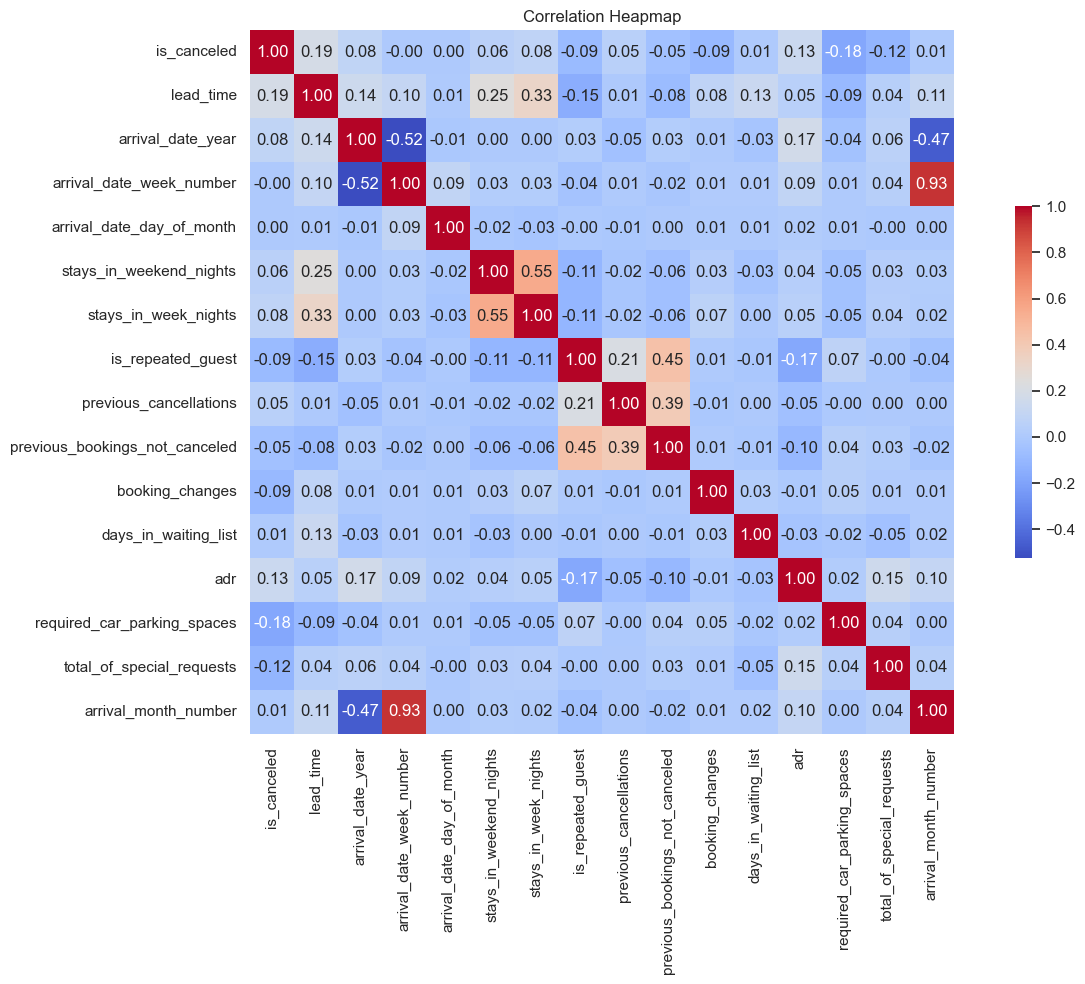

In [91]:
#coorelation heatmap

numeric_df=df.select_dtypes(include=['int64','float64'])
corr_matrix=numeric_df.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm',square=True,cbar_kws={'shrink':0.5})
plt.title('Correlation Heapmap')
plt.tight_layout()
plt.show()